In [1]:
# set work dir
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scienceplots
plt.style.reload_library()
plt.style.use("science")
from matplotlib import ticker
import tol_colors as tc

In [3]:
dims = [1, 2, 3, 4, 5]

In [4]:
def lighten(color, amount=0.9):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = np.array(colorsys.rgb_to_hls(*mc.to_rgb(c)))
    return colorsys.hls_to_rgb(c[0],1-amount * (1-c[1]),c[2])

In [5]:
def drawPlot(dims, n, d, e):
    regrets = getRow(dims, n, d, e)
    # color map
    cset =  tc.tol_cset('light')
    cmap = tc.tol_cmap("rainbow_discrete")(np.linspace(0, 1, 22))
    colors = [cset.mint, cset.pink, cmap[16], cmap[5], cmap[7], cmap[10]]
    for i in range(len(colors)):
        colors[i] = lighten(colors[i])
    # x tick
    x = np.array([i for i in range(len(dims))])
    # loss
    fig = plt.figure(figsize=(16, 8))
    # line
    c = colors[0]
    plt.plot(x-0.36, regrets["lr"].mean(), linewidth=2, color=c)
    c = colors[1]
    plt.plot(x-0.18, regrets["rf"].mean(), linewidth=2, color=c)
    c = colors[2]
    plt.plot(x, regrets["spo"].mean(), linewidth=2, color=c)
    c = colors[3]
    plt.plot(x+0.18, regrets["pfyl"].mean(), linewidth=2, color=c)
    c = colors[4]
    plt.plot(x+0.36, regrets["dbb"].mean(), linewidth=2, color=c)
    # box plot
    #===========================================================================================================================
    c = colors[0]
    bp1 = plt.boxplot(regrets["lr"], 
                      boxprops=dict(facecolor=c, color=c, linewidth=4), 
                      medianprops=dict(color="w", linewidth=2), 
                      whiskerprops=dict(color=c, linewidth=2),
                      capprops=dict(color=c, linewidth=2),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=5, markeredgewidth=2),
                      patch_artist=True, positions=np.arange(regrets["lr"].shape[1])-0.36, widths=0.04)
    #===========================================================================================================================
    c = colors[1]
    bp2 = plt.boxplot(regrets["rf"], 
                      boxprops=dict(facecolor=c, color=c, linewidth=4), 
                      medianprops=dict(color="w", linewidth=2), 
                      whiskerprops=dict(color=c, linewidth=2),
                      capprops=dict(color=c, linewidth=2),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=5, markeredgewidth=2),
                      patch_artist=True, positions=np.arange(regrets["rf"].shape[1])-0.18, widths=0.04)
    #===========================================================================================================================
    c = colors[2]
    bp3 = plt.boxplot(regrets["spo"], 
                      boxprops=dict(facecolor=c, color=c, linewidth=4), 
                      medianprops=dict(color="w", linewidth=2), 
                      whiskerprops=dict(color=c, linewidth=2),
                      capprops=dict(color=c, linewidth=2),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=5, markeredgewidth=2),
                      patch_artist=True, positions=np.arange(regrets["spo"].shape[1]), widths=0.04)
    #===========================================================================================================================
    c = colors[3]
    bp4 = plt.boxplot(regrets["pfyl"], 
                      boxprops=dict(facecolor=c, color=c, linewidth=4), 
                      medianprops=dict(color="w", linewidth=2), 
                      whiskerprops=dict(color=c, linewidth=2),
                      capprops=dict(color=c, linewidth=2),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=5, markeredgewidth=2),
                      patch_artist=True, positions=np.arange(regrets["pfyl"].shape[1])+0.18, widths=0.04)
    #===========================================================================================================================
    c = colors[4]
    bp5 = plt.boxplot(regrets["dbb"], 
                      boxprops=dict(facecolor=c, color=c, linewidth=4), 
                      medianprops=dict(color="w", linewidth=2), 
                      whiskerprops=dict(color=c, linewidth=2),
                      capprops=dict(color=c, linewidth=2),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=5, markeredgewidth=2),
                      patch_artist=True, positions=np.arange(regrets["dbb"].shape[1])+0.36, widths=0.04)
    # vertical line
    plt.axvline(x=0.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=1.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=2.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=3.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    # grid
    plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
    # labels and ticks
    plt.xlim(-0.5, 4.5)
    plt.ylim(0, 0.24)
    plt.xticks(x, dims, fontsize=28)
    plt.yticks(fontsize=24)
    plt.xlabel("Resource Dimension", fontsize=36)
    plt.ylabel("Normalized Regret", fontsize=36)
    plt.title("Test Loss on 2D Knapsack\nTraining Set Size = {}, Polynomial Degree = {}, Noise Half−width = {}".format(n,d,e),
              fontsize=30)
    plt.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0], bp5["boxes"][0]],
               ["2-stage LR", "2-stage RF", "SPO+", "PFYL", "DBB"], 
               fontsize=22, loc=2, labelspacing=0.2, handlelength=1, ncol=2)
    # save
    plt.show()
    fig.savefig("./images/scale-ks-n{}d{}e{}-loss.pdf".format(n,d,int(10*e)), dpi=300)

In [6]:
def getRow(dims, n, d, e):
    regrets = {"lr":pd.DataFrame(), "rf":pd.DataFrame(), "spo":pd.DataFrame(), "pfyl":pd.DataFrame(), "dbb":pd.DataFrame()}
    for dim in dims:
        r = getData(dim, n, d, e)
        for m in regrets:
            regrets[m][dim] = r[m]
    return regrets

In [7]:
def getData(dim, n, d, e):
    # dir
    dir_name = "./res/ks/i32d{}c20/gurobi".format(dim)
    file_name = {}
    file_name["lr"] = "n{}p5-d{}-e{}_2s-lr.csv".format(n,d,e)
    file_name["rf"] = "n{}p5-d{}-e{}_2s-rf.csv".format(n,d,e)
    file_name["spo"] = "n{}p5-d{}-e{}_spo_lr_adam0.01_bs32_l10.0l20.0_c32.csv".format(n,d,e)
    file_name["pfyl"] = "n{}p5-d{}-e{}_pfyl_lr_adam0.01_bs32_l10.0l20.0_c32-samp1eps1.0.csv".format(n,d,e)
    file_name["dbb"] = "n{}p5-d{}-e{}_dbb_lr_adam0.1_bs32_l10.0l20.0_c32-lamb10.csv".format(n,d,e)
    # load data
    regret= {}
    for m, f in file_name.items():
        df = pd.read_csv(dir_name + "/" + f)
        regret[m] = df["Unamb SPO"]
    return regret

## Deg = 1 

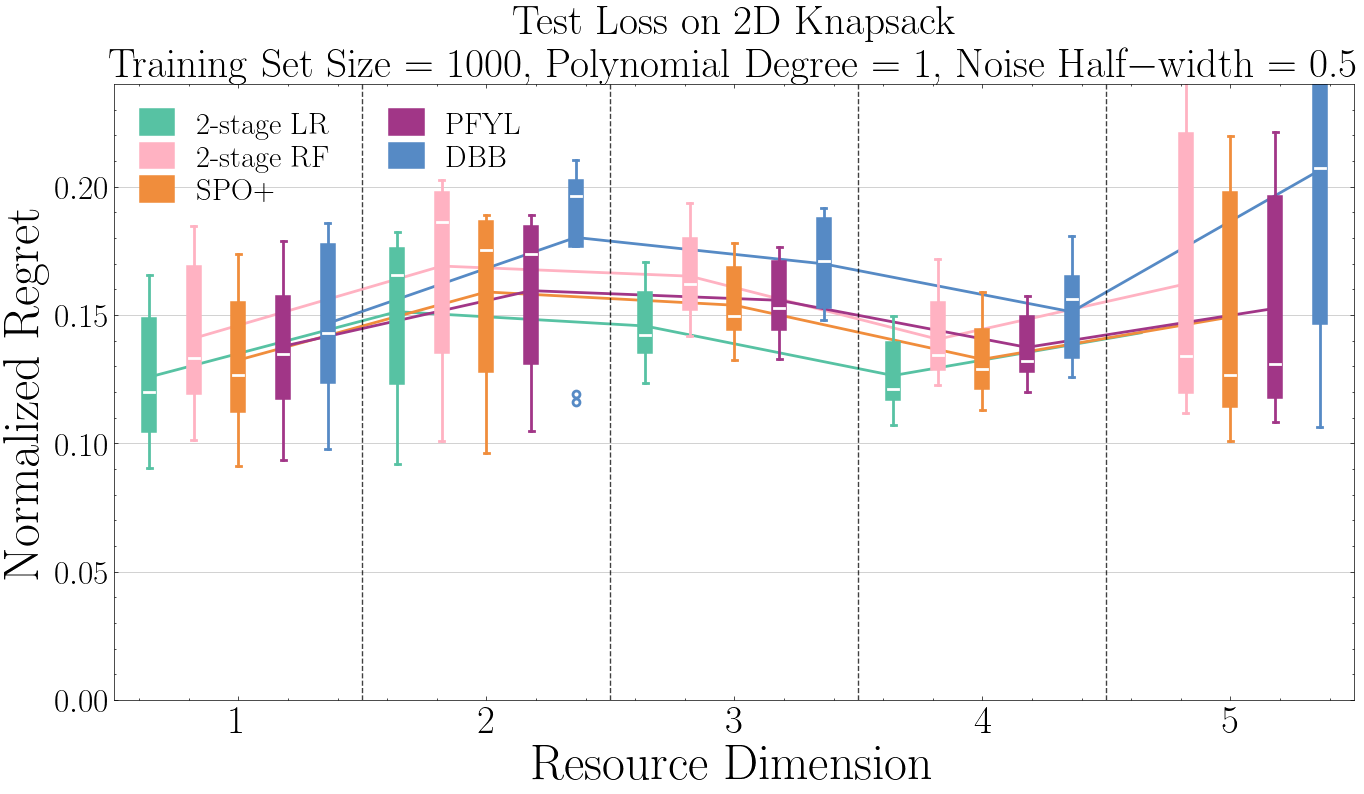

In [8]:
n = 1000
d = 1
e = 0.5
drawPlot(dims, n, d, e)

## Deg = 2 

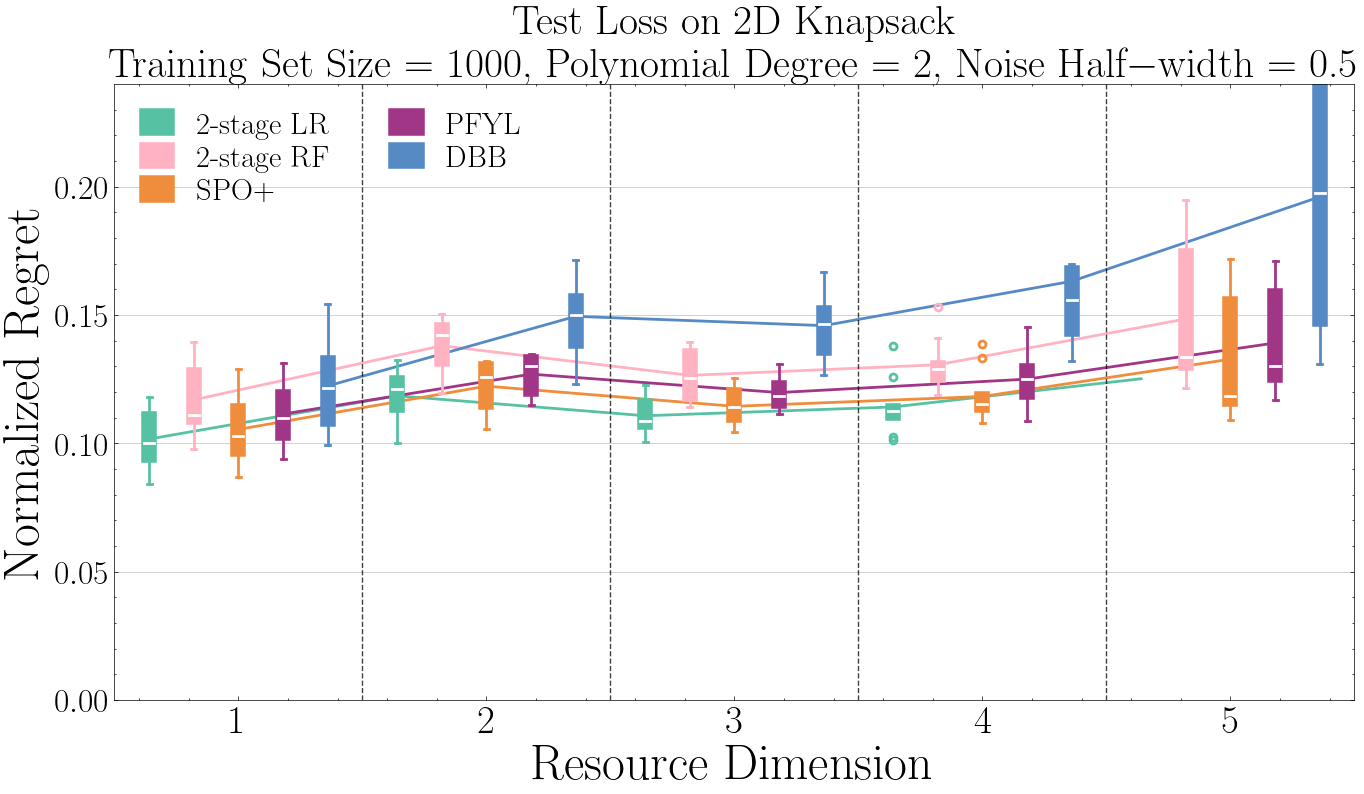

In [9]:
n = 1000
d = 2
e = 0.5
drawPlot(dims, n, d, e)

## Deg = 4 

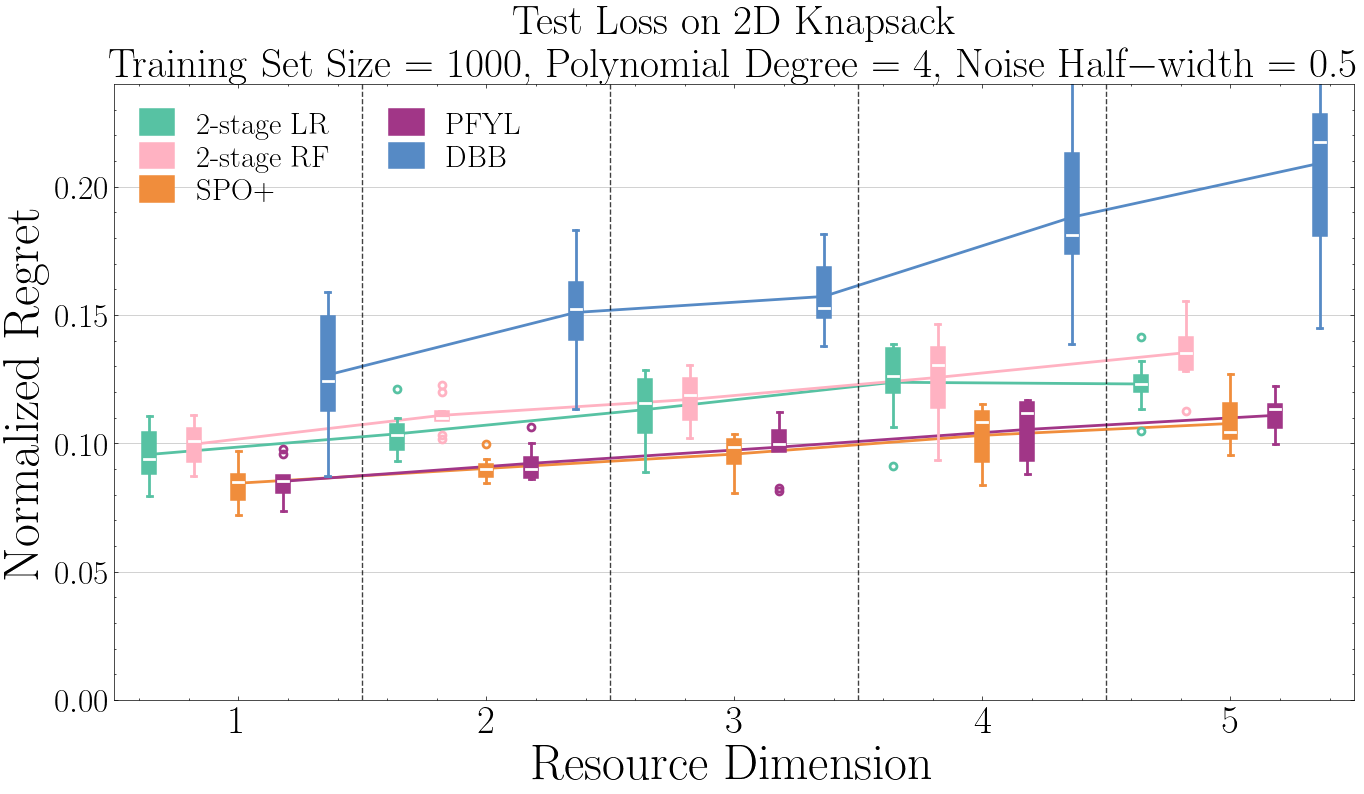

In [10]:
n = 1000
d = 4
e = 0.5
drawPlot(dims, n, d, e)

## Deg = 6 

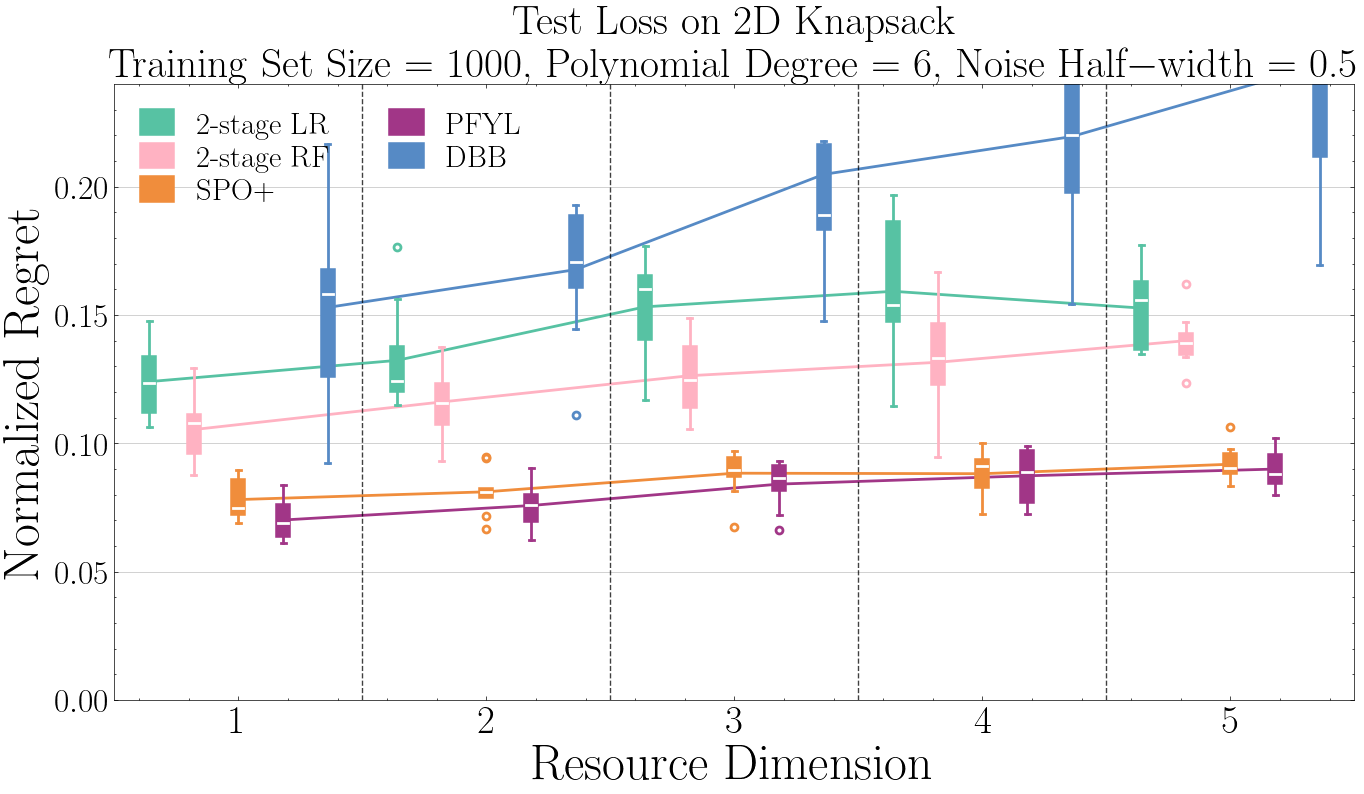

In [11]:
n = 1000
d = 6
e = 0.5
drawPlot(dims, n, d, e)